In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal

# 한글 폰트 설정
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 활동소비내역 테이블 전처리

In [3]:
# colab에서 드라이브 마운트 후, 파일 경로 변수에 담기
consume_filepath_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tn_activity_consume_his_활동소비내역_B.csv'
consume_filepath_tl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/tl/tn_activity_consume_his_활동소비내역_B.csv'
consume_filepath_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vs/tn_activity_consume_his_활동소비내역_B.csv'
consume_filepath_vl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vl/tn_activity_consume_his_활동소비내역_B.csv'

# CSV 파일 -> Dataframe으로 읽어오기
def load_data(filepath):
  return pd.read_csv(filepath)

activity_consume_ts = load_data(consume_filepath_ts)
activity_consume_tl = load_data(consume_filepath_tl)
activity_consume_vs = load_data(consume_filepath_vs)
activity_consume_vl = load_data(consume_filepath_vl)

In [4]:
activity_consume_ts.tail()

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
19819,b_b000387,2208170002,1,0,0,1,1,NaN,꽈페 경주황리단길점,경북 경주시 첨성로81번길 15-1,경북 경주시 황남동 315-4,4716145.0,4.713011e+09,2022-08-17 13:06:00.000,3.0,2500.0,NaN,NaN
19820,b_b005679,2210020003,1,0,0,1,2,1.408158e+09,그린익스프레스파크,경기 시흥시 수도권제1순환고속도로 105,경기 시흥시 조남동 산 15-1,1000140.0,4.139012e+09,2022-10-02 09:27:00.000,1.0,23300.0,갈비탕;닭곰탕,NaN
19821,b_b005672,2210020009,1,0,0,1,2,6.012061e+09,광명갈비,경북 영주시 풍기읍 풍기로 71-10,경북 영주시 풍기읍 성내리 19-8,3309069.0,4.721025e+09,2022-10-02 19:42:00.000,1.0,28000.0,돼지생갈비200G; 음료수,NaN
19822,b_b001387,2208200003,3,0,0,1,2,3.048264e+09,단양군사격협회,충북 단양군 단양읍 노동장현로 207-17,충북 단양군 단양읍 기촌리 342-1,3248008.0,4.380025e+09,2022-08-20 14:01:00.000,1.0,50000.0,NaN,NaN
19823,b_b009565,2210290004,1,2,2,1,2,2.891902e+09,이마트24밀양영남루점,경남 밀양시 중앙로 339-1,경남 밀양시 내일동 196-19,3336074.0,4.827010e+09,2022-10-29 16:43:00.000,1.0,1800.0,자일리톨빅팩F;농심)멘토스레인보우,NaN


In [5]:
activity_consume_vs.tail()

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
2473,b_b000720,2209010005,1,0,0,1,1,1.078657e+09,코레일유통㈜,강원 강릉시 강동면 정동역길 17,강원 강릉시 강동면 정동진리 303,4460884.0,4.215034e+09,2022-09-01 14:42:00.000,1.0,3200.0,ICED 아메리카노,NaN
2474,b_b005175,2210220002,1,0,0,1,2,8.250602e+09,황정숙막국수,강원 동해시 중앙로 42,강원 동해시 용정동 233-8,3221040.0,4.217010e+09,2022-10-22 12:17:00.000,1.0,25000.0,메밀전병;물막국수,NaN
2475,b_b010055,2210260003,3,0,0,1,1,4.628802e+09,(주)쥬간도,강원 속초시 청호해안길 2,강원 속초시 조양동 1450-143,4469283.0,4.221011e+09,2022-10-26 11:46:00.000,1.0,12000.0,속초아이(대인),NaN
2476,b_b006315,2210020005,3,0,0,2,1,2.268142e+09,농업회사법인 우덕축산주식회사,강원 평창군 대관령면 꽃밭양지길 458-23,NaN,4484055.0,4.276038e+09,2022-10-02 10:31:00.000,1.0,5000.0,반려견 입장,NaN
2477,b_b001275,2208220002,1,0,0,1,1,6.218199e+09,주식회사 아난티코브,부산 기장군 기장읍 기장해안로 268-31,부산 기장군 기장읍 시랑리 704,3140057.0,2.671025e+09,2022-08-22 14:27:00.000,1.0,15500.0,NaN,NaN


In [6]:
# DataFrame 합치기 (행 기준으로 아래로 붙이기)
## ignore_index = True : 기존 인덱스를 무시하고 새로 인덱스를 부여
## 만약 컬럼 이름이나 순서가 다르면, 없는 칼럼은 NaN으로 채워짐
def merge_data(*filenames):
  return pd.concat(filenames, ignore_index = True)

activity_consume_merged = merge_data(activity_consume_ts, activity_consume_vs, activity_consume_tl, activity_consume_vl)
activity_consume_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b011174,2210240003,2,1,1,1,1,NaN,코레일유통,대구 동구 동대구로 550,NaN,3007004.0,2.714010e+09,2022-10-24 19:16:00.000,1.0,8000.0,NaN,NaN
1,b_b004534,2210010001,1,0,0,1,3,7.083900e+09,방하착커피앤베이커리,강원 속초시 설악산로 1096,강원 속초시 설악동 151,3223005.0,4.221011e+09,2022-10-01 10:52:00.000,1.0,18000.0,아이스아메리카노,NaN
2,b_b005652,2210120003,1,0,0,1,1,1.728701e+09,내류사,경북 경주시 영불로 263-7,경북 경주시 진현동 71-10,3305043.0,4.713013e+09,2022-10-12 11:29:00.000,1.0,5800.0,ICE바닐라라떼,NaN
3,b_b006597,2210160004,2,4,4,0,2,NaN,베스트할인마트,부산시 동래구 복천로5번길 34 상가동103호,NaN,NaN,NaN,NaN,1.0,1400.0,NaN,2.626010e+09
4,b_b002171,2208210004,1,0,0,1,2,8.081601e+09,도문,강원 속초시 상도문1길 31,강원 속초시 도문동 206-1,4469108.0,4.221011e+09,2022-08-21 11:34:00.000,1.0,11000.0,아메리카노(ICE),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44599,b_b000720,2209010005,1,0,0,1,1,1.078657e+09,코레일유통㈜,강원 강릉시 강동면 정동역길 17,강원 강릉시 강동면 정동진리 303,4460884.0,4.215034e+09,2022-09-01 14:42:00.000,1.0,3200.0,ICED 아메리카노,NaN
44600,b_b005175,2210220002,1,0,0,1,2,8.250602e+09,황정숙막국수,강원 동해시 중앙로 42,강원 동해시 용정동 233-8,3221040.0,4.217010e+09,2022-10-22 12:17:00.000,1.0,25000.0,메밀전병;물막국수,NaN
44601,b_b010055,2210260003,3,0,0,1,1,4.628802e+09,(주)쥬간도,강원 속초시 청호해안길 2,강원 속초시 조양동 1450-143,4469283.0,4.221011e+09,2022-10-26 11:46:00.000,1.0,12000.0,속초아이(대인),NaN
44602,b_b006315,2210020005,3,0,0,2,1,2.268142e+09,농업회사법인 우덕축산주식회사,강원 평창군 대관령면 꽃밭양지길 458-23,NaN,4484055.0,4.276038e+09,2022-10-02 10:31:00.000,1.0,5000.0,반려견 입장,NaN


In [7]:
# 중복 제거
def deduplicate_data(filename):
  filename.drop_duplicates(inplace = True)
  return filename

activity_consume_deduplicate = deduplicate_data(activity_consume_merged)
activity_consume_deduplicate


,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b011174,2210240003,2,1,1,1,1,NaN,코레일유통,대구 동구 동대구로 550,NaN,3007004.0,2.714010e+09,2022-10-24 19:16:00.000,1.0,8000.0,NaN,NaN
1,b_b004534,2210010001,1,0,0,1,3,7.083900e+09,방하착커피앤베이커리,강원 속초시 설악산로 1096,강원 속초시 설악동 151,3223005.0,4.221011e+09,2022-10-01 10:52:00.000,1.0,18000.0,아이스아메리카노,NaN
2,b_b005652,2210120003,1,0,0,1,1,1.728701e+09,내류사,경북 경주시 영불로 263-7,경북 경주시 진현동 71-10,3305043.0,4.713013e+09,2022-10-12 11:29:00.000,1.0,5800.0,ICE바닐라라떼,NaN
3,b_b006597,2210160004,2,4,4,0,2,NaN,베스트할인마트,부산시 동래구 복천로5번길 34 상가동103호,NaN,NaN,NaN,NaN,1.0,1400.0,NaN,2.626010e+09
4,b_b002171,2208210004,1,0,0,1,2,8.081601e+09,도문,강원 속초시 상도문1길 31,강원 속초시 도문동 206-1,4469108.0,4.221011e+09,2022-08-21 11:34:00.000,1.0,11000.0,아메리카노(ICE),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22297,b_b000720,2209010005,1,0,0,1,1,1.078657e+09,코레일유통㈜,강원 강릉시 강동면 정동역길 17,강원 강릉시 강동면 정동진리 303,4460884.0,4.215034e+09,2022-09-01 14:42:00.000,1.0,3200.0,ICED 아메리카노,NaN
22298,b_b005175,2210220002,1,0,0,1,2,8.250602e+09,황정숙막국수,강원 동해시 중앙로 42,강원 동해시 용정동 233-8,3221040.0,4.217010e+09,2022-10-22 12:17:00.000,1.0,25000.0,메밀전병;물막국수,NaN
22299,b_b010055,2210260003,3,0,0,1,1,4.628802e+09,(주)쥬간도,강원 속초시 청호해안길 2,강원 속초시 조양동 1450-143,4469283.0,4.221011e+09,2022-10-26 11:46:00.000,1.0,12000.0,속초아이(대인),NaN
22300,b_b006315,2210020005,3,0,0,2,1,2.268142e+09,농업회사법인 우덕축산주식회사,강원 평창군 대관령면 꽃밭양지길 458-23,NaN,4484055.0,4.276038e+09,2022-10-02 10:31:00.000,1.0,5000.0,반려견 입장,NaN


In [8]:
print(activity_consume_deduplicate.columns)

Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD'],
      dtype='object')


In [9]:
# 필요한 컬럼만 남기기
activity_consume_columns = ['TRAVEL_ID', 'PAYMENT_NUM', 'PAYMENT_AMT_WON']

def filter_data(filename, columns):
  filtered_data = filename[columns]
  return filtered_data

activity_consume = filter_data(activity_consume_deduplicate, activity_consume_columns)
activity_consume


,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON
0,b_b011174,1,8000.0
1,b_b004534,3,18000.0
2,b_b005652,1,5800.0
3,b_b006597,2,1400.0
4,b_b002171,2,11000.0
...,...,...,...
22297,b_b000720,1,3200.0
22298,b_b005175,2,25000.0
22299,b_b010055,1,12000.0
22300,b_b006315,1,5000.0


In [10]:
# 소비 금액, 소비 인원이 0인 경우 제거
activity_consume = activity_consume[activity_consume['PAYMENT_NUM'] > 0]
activity_consume = activity_consume[activity_consume['PAYMENT_AMT_WON'] > 0]


# 각 행 기준으로 1인당 소비금액 계산
activity_consume['1인당소비금액'] = activity_consume['PAYMENT_AMT_WON'] / activity_consume['PAYMENT_NUM']
activity_consume

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON,1인당소비금액
0,b_b011174,1,8000.0,8000.0
1,b_b004534,3,18000.0,6000.0
2,b_b005652,1,5800.0,5800.0
3,b_b006597,2,1400.0,700.0
4,b_b002171,2,11000.0,5500.0
...,...,...,...,...
22297,b_b000720,1,3200.0,3200.0
22298,b_b005175,2,25000.0,12500.0
22299,b_b010055,1,12000.0,12000.0
22300,b_b006315,1,5000.0,5000.0


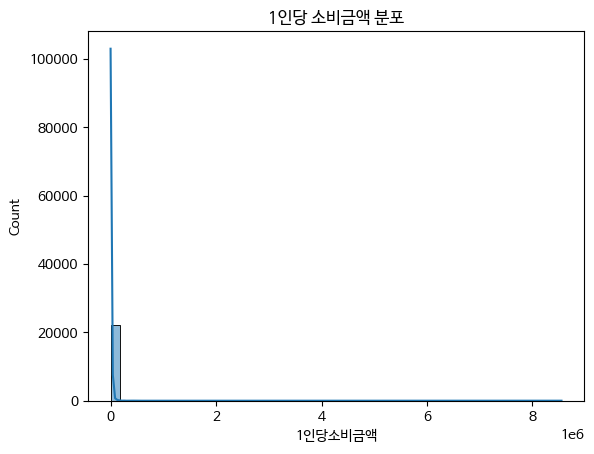

In [11]:
# 분포 확인
## sns.histplot() : Seaborn의 히스토그램 함수. 수치형 데이터의 빈도 분포를 시각화.
## bins = 50 : 막대(빈)의 개수를 50개로 설정
## kde = True : KDE(Kernel Density Estimation)를 함께 그림. 즉, 분포의 부드러운 곡선형 밀도 추정선을 그림.
sns.histplot(activity_consume['1인당소비금액'], bins = 50, kde = True)
plt.title("1인당 소비금액 분포")
plt.show()

In [12]:
# 왜도 확인
## 왜도 > 0 : 오른쪽 꼬리가 긴 분포 (Positive Skew) → 평균 > 중앙값
## 왜도 < 0 : 왼쪽 꼬리가 긴 분포 (Negative Skew) → 평균 < 중앙값
activity_consume['1인당소비금액'].skew()

np.float64(123.27704213120667)

In [13]:
# 이상치 확인
Q1 = activity_consume['PAYMENT_AMT_WON'].quantile(0.25)
Q3 = activity_consume['PAYMENT_AMT_WON'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# PAYMENT_AMT_WON 값이 하한보다 작은 경우 (< lower_bound) 또는(|) 상한보다 큰 경우 (> upper_bound), outliers 변수에 담기
outliers = activity_consume[(activity_consume['PAYMENT_AMT_WON'] < lower_bound) |
                             (activity_consume['PAYMENT_AMT_WON'] > upper_bound)]
print("이상치 개수:", len(outliers))

이상치 개수: 1606


In [14]:
# 여행 단위로 평균 계산
activity_consume_mean = activity_consume.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].mean().round(2)
activity_consume_mean

,TRAVEL_ID,1인당소비금액
0,a_a000155,9480.28
1,a_a000193,10510.00
2,a_a000316,9066.67
3,a_a000330,11946.15
4,a_a000423,8706.00
...,...,...
3885,d_d005253,8437.50
3886,d_d005737,20100.00
3887,d_d006239,12675.00
3888,d_d007458,5416.67


In [15]:
# 여행 단위로 중앙 값 계산
activity_consume_median = activity_consume.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].median().round(2)
activity_consume_median.columns = ['TRAVEL_ID', '1인당소비금액(중앙값)']
activity_consume_median

,TRAVEL_ID,1인당소비금액(중앙값)
0,a_a000155,5225.0
1,a_a000193,7500.0
2,a_a000316,9625.0
3,a_a000330,7500.0
4,a_a000423,8000.0
...,...,...
3885,d_d005253,7000.0
3886,d_d005737,14750.0
3887,d_d006239,10500.0
3888,d_d007458,6000.0


**이상치가 많으므로 중앙 값 사용**

In [16]:
# 데이터 확인용 csv 파일 저장
activity_consume_median.to_csv('activity_consume_median.csv', index=False, encoding='utf-8')

# 동반자정보 테이블 전처리

In [17]:
companion_filepath_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tn_companion_info_동반자정보_B.csv'
companion_filepath_tl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/tl/tn_companion_info_동반자정보_B.csv'
companion_filepath_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vs/tn_companion_info_동반자정보_B.csv'
companion_filepath_vl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vl/tn_companion_info_동반자정보_B.csv'

companion_info_ts = load_data(companion_filepath_ts)
companion_info_tl = load_data(companion_filepath_tl)
companion_info_vs = load_data(companion_filepath_vs)
companion_info_vl = load_data(companion_filepath_vl)

In [18]:
companion_info_ts.info()
companion_info_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        4932 non-null   int64 
 1   TRAVEL_ID            4932 non-null   object
 2   REL_CD               4932 non-null   int64 
 3   COMPANION_GENDER     4932 non-null   int64 
 4   COMPANION_AGE_GRP    4932 non-null   int64 
 5   COMPANION_SITUATION  4932 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 231.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        616 non-null    int64 
 1   TRAVEL_ID            616 non-null    object
 2   REL_CD               616 non-null    int64 
 3   COMPANION_GENDER     616 non-null    int64 
 4   COMPANION_AGE_GRP    616 non-null    int64 
 5 

In [19]:
companion_info_merged = merge_data(companion_info_ts, companion_info_ts, companion_info_vs, companion_info_vl)
companion_info_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1
...,...,...,...,...,...,...
11091,2,b_b015428,2,2,2,1
11092,5,b_b002849,1,1,4,1
11093,2,b_b002885,2,1,2,1
11094,3,b_b011503,2,1,3,1


In [20]:
companion_info_deduplicate = deduplicate_data(companion_info_merged)
companion_info_deduplicate

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1
...,...,...,...,...,...,...
10475,2,b_b015428,2,2,2,1
10476,5,b_b002849,1,1,4,1
10477,2,b_b002885,2,1,2,1
10478,3,b_b011503,2,1,3,1


In [21]:
companion_info_columns = ['TRAVEL_ID', 'REL_CD', 'COMPANION_SITUATION']
companion_info = filter_data(companion_info_deduplicate, companion_info_columns)
companion_info

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,1,1
1,b_b004786,6,3
2,b_b002864,1,1
3,b_b011077,2,1
4,b_b000838,2,1
...,...,...,...
10475,b_b015428,2,1
10476,b_b002849,1,1
10477,b_b002885,2,1
10478,b_b011503,2,1


In [22]:
# TRAVEL_ID별로 COMPANION_SITUATION이 전부 1(계속여행)인지 확인
## .groupby('TRAVEL_ID')['COMPANION_SITUATION'] : TRAVEL_ID가 같은 데이터끼리 그룹으로 묶고, 그 그룹에서 COMPANION_SITUATION 열만 선택
## .apply(lambda x: ...) : 각 그룹(즉, TRAVEL_ID별 데이터)에 대해 lambda 함수를 적용
## set(x) : 리스트나 시리즈에서 중복을 제거한 고유값만 집합(set)으로 만듦  ## set([1, 1, 1])   → {1}
companion_info_valid = companion_info.groupby('TRAVEL_ID')['COMPANION_SITUATION'].apply(lambda x: set(x) == {1})
companion_info_valid

,COMPANION_SITUATION
TRAVEL_ID,
a_a000155,True
a_a000193,True
a_a000316,True
a_a000330,True
a_a000423,True
...,...
d_d003982,True
d_d005168,True
d_d005253,True


In [23]:
# 조건 만족하는 TRAVEL_ID만 추출
## companion_info_valid[companion_info_valid] : 자기 자신을 조건으로 필터링 == companion_info_valid[companion_info_valid == True]
companion_info_valid = companion_info_valid[companion_info_valid].index
companion_info_valid

Index(['a_a000155', 'a_a000193', 'a_a000316', 'a_a000330', 'a_a000423',
       'a_a000594', 'a_a001011', 'a_a001481', 'a_a001630', 'a_a001698',
       ...
       'c_c014221', 'd_d001459', 'd_d002346', 'd_d002778', 'd_d002966',
       'd_d003982', 'd_d005168', 'd_d005253', 'd_d007458', 'd_d008009'],
      dtype='object', name='TRAVEL_ID', length=2447)

In [24]:
# companion_info에서 해당 ID만 남기기
## .isin(companion_info_valid) : TRAVEL_ID가 companion_info_valid 목록에 있는지 True/False로 판단
## companion_info[...] : [] 안의 조건에 대해 True인 열만 남김
companion_info_filtered = companion_info[companion_info['TRAVEL_ID'].isin(companion_info_valid)]
companion_info_filtered

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,1,1
2,b_b002864,1,1
3,b_b011077,2,1
4,b_b000838,2,1
7,b_b007982,2,1
...,...,...,...
10474,b_b011076,1,1
10475,b_b015428,2,1
10477,b_b002885,2,1
10478,b_b011503,2,1


In [25]:
# REL_CD 매핑
## 관계 코드표 불러오기
code_df = load_data(r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tc_codeb_코드B.csv')

## 동반자 관계 코드만 필터링
rel_cd_map = code_df[code_df['cd_a'] == 'TCR'][['cd_b', 'cd_nm']]

## 딕셔너리로 변환
### zip(a, b)는 두 리스트를 묶어서 튜플의 반복자(iterator)를 만듦  ### [(1, '배우자'), (2, '자녀'), ...]
### 여기에 dict()를 입히면 → 첫 번째 값이 key, 두 번째 값이 value인 딕셔너리가 됨
rel_cd_dict = dict(zip(rel_cd_map['cd_b'], rel_cd_map['cd_nm']))

## companion_info의 REL_CD에 적용
### .astype(str) : pandas에서 컬럼의 데이터 타입을 문자열(str)로 변환할 때 사용하는 함수
### .map() : pandas Series에서 값을 변환하거나 매핑할 때 쓰는 함수 ### Series.map(매핑규칙 또는 함수)
companion_info_filtered.loc[:, 'REL_CD'] = companion_info_filtered['REL_CD'].astype(str).map(rel_cd_dict)
companion_info_filtered

/tmp/ipython-input-25-1286053416.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['배우자' '배우자' '자녀' ... '자녀' '자녀' '자녀']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  companion_info_filtered.loc[:, 'REL_CD'] = companion_info_filtered['REL_CD'].astype(str).map(rel_cd_dict)


,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,배우자,1
2,b_b002864,배우자,1
3,b_b011077,자녀,1
4,b_b000838,자녀,1
7,b_b007982,자녀,1
...,...,...,...
10474,b_b011076,배우자,1
10475,b_b015428,자녀,1
10477,b_b002885,자녀,1
10478,b_b011503,자녀,1


In [26]:
# TRAVEL_ID를 기준으로 REL_CD 합치기
companion_info_unique = (
    companion_info_filtered.groupby('TRAVEL_ID')['REL_CD']  # TRAVEL_ID를 기준으로 그룹을 만들고, 각 그룹에서 REL_CD만 뽑아냄
    .apply(lambda x: ','.join(sorted(set(x))))  # 중복 제거(set) 후 정렬(sorted) → 정렬된 리스트를 쉼표(,)로 이어 붙여서 하나의 문자열로 만듦
    .reset_index()  # .reset_index()로 다시 DataFrame 형태로 변환
)

companion_info_unique

,TRAVEL_ID,REL_CD
0,a_a000155,자녀
1,a_a000193,연인
2,a_a000316,배우자
3,a_a000330,"배우자,자녀"
4,a_a000423,친구
...,...,...
2442,d_d003982,"배우자,자녀,형제/자매"
2443,d_d005168,"배우자,자녀"
2444,d_d005253,연인
2445,d_d007458,"배우자,자녀"


In [27]:
# 데이터 확인용 csv 파일 저장
companion_info_unique.to_csv('companion_info_unique.csv', index=False, encoding='utf-8')

# 여행 테이블 전처리

In [28]:
travel_filepath_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tn_travel_여행_B.csv'
travel_filepath_tl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/tl/tn_travel_여행_B.csv'
travel_filepath_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vs/tn_travel_여행_B.csv'
travel_filepath_vl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vl/tn_travel_여행_B.csv'

travel_ts = load_data(travel_filepath_ts)
travel_tl = load_data(travel_filepath_tl)
travel_vs = load_data(travel_filepath_vs)
travel_vl = load_data(travel_filepath_vl)

In [29]:
travel_ts.info()
travel_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2591 non-null   object
 7   TRAVEL_PERSONA        625 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [30]:
travel_merged = merge_data(travel_ts, travel_ts, travel_vs, travel_vl)
travel_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b015715,B04,b015715,22;,2022-10-29,2022-10-30,대중교통 등,NaN,22;,22;4;1
1,b_b000419,B01,b000419,21;,2022-08-06,2022-08-08,자가용,NaN,2;,21;11;5
2,b_b013638,B01,b013638,28;,2022-11-05,2022-11-06,NaN,NaN,28;,3;6;21
3,b_b007836,B02,b007836,13;24;26;3;4;,2022-10-18,2022-10-19,대중교통 등,NaN,13;24;26;3;4;,26;6;3
4,b_b004718,B04,b004718,1;26;6;9;,2022-10-01,2022-10-03,대중교통 등,경상권에 거주하는 39세 이하 커플,1;26;6;9;,9;6;1
...,...,...,...,...,...,...,...,...,...,...
7195,b_b007597,B03,b007597,2;22;23;4;,2022-10-19,2022-10-20,대중교통 등,NaN,2;22;23;4;,22;4;6
7196,b_b009383,B04,b009383,1;22;23;4;6;,2022-10-16,2022-10-18,대중교통 등,NaN,1;22;23;4;6;,6;4;1
7197,b_b014698,B06,b014698,9;26;,2022-10-29,2022-10-30,자가용,NaN,9;26;,9;11;26
7198,b_b006727,B03,b006727,21;22;6;,2022-10-15,2022-10-16,NaN,NaN,21;22;6;,6;21;22


In [31]:
travel_deduplicate = deduplicate_data(travel_merged)
travel_deduplicate

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b015715,B04,b015715,22;,2022-10-29,2022-10-30,대중교통 등,NaN,22;,22;4;1
1,b_b000419,B01,b000419,21;,2022-08-06,2022-08-08,자가용,NaN,2;,21;11;5
2,b_b013638,B01,b013638,28;,2022-11-05,2022-11-06,NaN,NaN,28;,3;6;21
3,b_b007836,B02,b007836,13;24;26;3;4;,2022-10-18,2022-10-19,대중교통 등,NaN,13;24;26;3;4;,26;6;3
4,b_b004718,B04,b004718,1;26;6;9;,2022-10-01,2022-10-03,대중교통 등,경상권에 거주하는 39세 이하 커플,1;26;6;9;,9;6;1
...,...,...,...,...,...,...,...,...,...,...
6795,b_b007597,B03,b007597,2;22;23;4;,2022-10-19,2022-10-20,대중교통 등,NaN,2;22;23;4;,22;4;6
6796,b_b009383,B04,b009383,1;22;23;4;6;,2022-10-16,2022-10-18,대중교통 등,NaN,1;22;23;4;6;,6;4;1
6797,b_b014698,B06,b014698,9;26;,2022-10-29,2022-10-30,자가용,NaN,9;26;,9;11;26
6798,b_b006727,B03,b006727,21;22;6;,2022-10-15,2022-10-16,NaN,NaN,21;22;6;,6;21;22


In [32]:
travel_columns = ['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD']
travel = filter_data(travel_deduplicate, travel_columns)
travel

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
0,b_b015715,b015715,2022-10-29,2022-10-30
1,b_b000419,b000419,2022-08-06,2022-08-08
2,b_b013638,b013638,2022-11-05,2022-11-06
3,b_b007836,b007836,2022-10-18,2022-10-19
4,b_b004718,b004718,2022-10-01,2022-10-03
...,...,...,...,...
6795,b_b007597,b007597,2022-10-19,2022-10-20
6796,b_b009383,b009383,2022-10-16,2022-10-18
6797,b_b014698,b014698,2022-10-29,2022-10-30
6798,b_b006727,b006727,2022-10-15,2022-10-16


In [33]:
# 데이터 확인용 csv 파일 저장
travel.to_csv('travel.csv', index=False, encoding='utf-8')

In [34]:
travel[travel['TRAVEL_ID'] == 'b_b004786']

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
1159,b_b004786,b004786,2022-09-24,2022-09-26


# 여행객 테이블 전처리

In [35]:
traveller_filepath_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tn_traveller_master_여행객 Master_B.csv'
traveller_filepath_tl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/tl/tn_traveller_master_여행객 Master_B.csv'
traveller_filepath_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vs/tn_traveller_master_여행객 Master_B.csv'
traveller_filepath_vl = r'/content/drive/MyDrive/Colab Notebooks/project/resources/vl/tn_traveller_master_여행객 Master_B.csv'

traveller_ts = load_data(traveller_filepath_ts)
traveller_tl = load_data(traveller_filepath_tl)
traveller_vs = load_data(traveller_filepath_vs)
traveller_vl = load_data(traveller_filepath_vl)

In [36]:
traveller_ts.info()
traveller_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3028 non-null   float64
 9   JOB_ETC                    172 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2397 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [37]:
traveller_merged = merge_data(traveller_ts, traveller_ts, traveller_vs, traveller_vl)
traveller_merged

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b009514,31,여,20,6,1,1,3,3.0,NaN,...,2,4,울산광역시,경남,2인 여행(가족 외),2022-10-30~2022-10-30,6,2.0,NaN,1
1,b015795,29,여,30,6,1,1,1,3.0,NaN,...,6,6,광주광역시,대구,나홀로 여행,2022-10-29~2022-10-29,8,2.0,1.0,0
2,b004208,31,여,20,6,1,1,4,2.0,NaN,...,6,5,울산광역시,경북,2인 여행(가족 외),2022-09-24~2022-09-25,3,7.0,5.0,1
3,b006840,11,여,30,6,1,1,4,3.0,NaN,...,1,7,서울특별시,강원,나홀로 여행,2022-10-05~2022-10-05,5,7.0,1.0,1
4,b002386,26,남,40,4,1,2,4,5.0,NaN,...,7,7,부산광역시,울산,자녀 동반 여행,2022-08-22~2022-08-23,3,7.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,b006766,11,여,20,6,1,1,1,3.0,NaN,...,5,5,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,2.0,3.0,2
7196,b000760,11,여,20,6,1,2,2,3.0,NaN,...,6,7,서울특별시,경북,2인 가족 여행,2022-08-20~2022-08-22,2,1.0,NaN,1
7197,b004329,11,남,40,6,1,2,3,3.0,NaN,...,1,7,서울특별시,강원,3대 동반 여행(친척 포함),2022-10-02~2022-10-03,2,1.0,8.0,3
7198,b005893,11,여,30,6,1,1,2,3.0,NaN,...,1,7,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,6.0,5.0,2


In [38]:
traveller_deduplicate = deduplicate_data(traveller_merged)
traveller_deduplicate

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b009514,31,여,20,6,1,1,3,3.0,NaN,...,2,4,울산광역시,경남,2인 여행(가족 외),2022-10-30~2022-10-30,6,2.0,NaN,1
1,b015795,29,여,30,6,1,1,1,3.0,NaN,...,6,6,광주광역시,대구,나홀로 여행,2022-10-29~2022-10-29,8,2.0,1.0,0
2,b004208,31,여,20,6,1,1,4,2.0,NaN,...,6,5,울산광역시,경북,2인 여행(가족 외),2022-09-24~2022-09-25,3,7.0,5.0,1
3,b006840,11,여,30,6,1,1,4,3.0,NaN,...,1,7,서울특별시,강원,나홀로 여행,2022-10-05~2022-10-05,5,7.0,1.0,1
4,b002386,26,남,40,4,1,2,4,5.0,NaN,...,7,7,부산광역시,울산,자녀 동반 여행,2022-08-22~2022-08-23,3,7.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,b006766,11,여,20,6,1,1,1,3.0,NaN,...,5,5,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,2.0,3.0,2
6796,b000760,11,여,20,6,1,2,2,3.0,NaN,...,6,7,서울특별시,경북,2인 가족 여행,2022-08-20~2022-08-22,2,1.0,NaN,1
6797,b004329,11,남,40,6,1,2,3,3.0,NaN,...,1,7,서울특별시,강원,3대 동반 여행(친척 포함),2022-10-02~2022-10-03,2,1.0,8.0,3
6798,b005893,11,여,30,6,1,1,2,3.0,NaN,...,1,7,서울특별시,강원,3인 이상 여행(가족 외),2022-10-03~2022-10-03,7,6.0,5.0,2


In [39]:
traveller_columns = ['TRAVELER_ID', 'TRAVEL_COMPANIONS_NUM']
traveller = filter_data(traveller_deduplicate, traveller_columns)
traveller

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
0,b009514,1
1,b015795,0
2,b004208,1
3,b006840,1
4,b002386,3
...,...,...
6795,b006766,2
6796,b000760,1
6797,b004329,3
6798,b005893,2


In [40]:
# 데이터 확인용 csv 파일 저장
traveller.to_csv('traveller.csv', index=False, encoding='utf-8')

In [41]:
traveller[traveller['TRAVELER_ID'] == 'b004786']

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
6511,b004786,5


# 데이터 합치기

In [42]:
travel.info()
activity_consume_median.info()
companion_info_unique.info()
traveller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 6799
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3600 non-null   object
 1   TRAVELER_ID       3600 non-null   object
 2   TRAVEL_START_YMD  3600 non-null   object
 3   TRAVEL_END_YMD    3600 non-null   object
dtypes: object(4)
memory usage: 269.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAVEL_ID     3890 non-null   object 
 1   1인당소비금액(중앙값)  3890 non-null   float64
dtypes: float64(1), object(1)
memory usage: 60.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TRAVEL_ID  2447 non-null   object
 1   REL_CD     2447 non-nu

In [43]:
# TRAVEL_ID를 기준으로 inner 조인
travel_consume = pd.merge(travel, activity_consume_median, on = 'TRAVEL_ID', how = 'inner')
travel_consume

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값)
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.00
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00
...,...,...,...,...,...
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67
3495,b_b014698,b014698,2022-10-29,2022-10-30,6500.00
3496,b_b006727,b006727,2022-10-15,2022-10-16,2875.00


In [44]:
# 조인 결과 + companion (TRAVELER_ID 기준 left 조인)
travel_consume_companion = pd.merge(travel_consume, companion_info_unique, on = 'TRAVEL_ID', how = 'left')
travel_consume_companion

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,NaN
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀"
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.00,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,NaN
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,NaN
...,...,...,...,...,...,...
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,NaN
3495,b_b014698,b014698,2022-10-29,2022-10-30,6500.00,친구
3496,b_b006727,b006727,2022-10-15,2022-10-16,2875.00,배우자


In [45]:
# 조인 결과 + traveller (TRAVELER_ID 기준 left 조인)
final_travel = pd.merge(travel_consume_companion, traveller, on ='TRAVELER_ID', how ='left')
final_travel

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD,TRAVEL_COMPANIONS_NUM
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀",3.0
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.00,NaN,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,NaN,1.0
...,...,...,...,...,...,...,...
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인,1.0
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,NaN,1.0
3495,b_b014698,b014698,2022-10-29,2022-10-30,6500.00,친구,NaN
3496,b_b006727,b006727,2022-10-15,2022-10-16,2875.00,배우자,2.0


# 합친 데이터(final_travel) 전처리

In [46]:
# code_a, code_b 파일 로드
codea_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tc_codea_코드A.csv'
codeb_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/ts/tc_codeb_코드B.csv'

code_a = load_data(codea_filepath)
code_b = load_data(codeb_filepath)

In [47]:
code_b

,idx,cd_nm,cd_a,cd_b,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
0,992,최초 로그인,STA,11,NaN,NaN,N,999,2022-07-05 10:37:07.000,NaN
1,993,테스트 사진 업로드,STA,12,NaN,NaN,N,999,2022-07-05 10:40:24.000,NaN
2,994,예정여행지변경신청,STA,13,NaN,NaN,N,999,2022-07-05 10:44:25.000,NaN
3,995,예정여행지변경승인,STA,14,NaN,NaN,N,999,2022-07-05 10:44:32.000,NaN
4,996,여행 중,STA,20,NaN,NaN,N,999,2022-07-05 10:44:38.000,NaN
...,...,...,...,...,...,...,...,...,...,...
232,1224,충북,TAR,C05,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
233,1225,충남,TAR,C06,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
234,1226,세종,TAR,C07,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
235,1227,제주,TAR,D01,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN


In [48]:
def build_code_dicts(code_b):
    code_dicts = {}
    for code in code_b['cd_a'].unique():
        sub = code_b[code_b['cd_a'] == code][['cd_b', 'cd_nm']].copy()
        sub['cd_b'] = pd.to_numeric(sub['cd_b'], errors='coerce').astype('Int64')
        code_dicts[code] = sub.set_index('cd_b')['cd_nm'].to_dict()
    return code_dicts

def map_codes(df, mapping_plan, code_dicts):
    for col, code_key in mapping_plan.items():
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        df[col] = df[col].map(code_dicts.get(code_key, {}))
    return df

def rename_columns(df, rename_map):
    return df.rename(columns=rename_map)

In [49]:
print(final_travel)

      TRAVEL_ID TRAVELER_ID TRAVEL_START_YMD TRAVEL_END_YMD  1인당소비금액(중앙값)  \
0     b_b015715     b015715       2022-10-29     2022-10-30       9000.00   
1     b_b000419     b000419       2022-08-06     2022-08-08      11500.00   
2     b_b013638     b013638       2022-11-05     2022-11-06      15200.00   
3     b_b007836     b007836       2022-10-18     2022-10-19      22500.00   
4     b_b004718     b004718       2022-10-01     2022-10-03       6000.00   
...         ...         ...              ...            ...           ...   
3493  b_b007597     b007597       2022-10-19     2022-10-20       6225.00   
3494  b_b009383     b009383       2022-10-16     2022-10-18      14666.67   
3495  b_b014698     b014698       2022-10-29     2022-10-30       6500.00   
3496  b_b006727     b006727       2022-10-15     2022-10-16       2875.00   
3497  c_c014221     c014221       2022-11-11     2022-11-12      17000.00   

      REL_CD  TRAVEL_COMPANIONS_NUM  
0        NaN                    0.0  

In [50]:
# Define mapping plan (col: code_key)
# mapping_plan = {'REL_CD': 'TCR', 'COMPANION_SITUATION': 'CST'}



# Rename columns
rename_map = {
    "TRAVEL_ID" : "여행ID",
    "TRAVELER_ID" : "여행객ID",
    "TRAVEL_START_YMD" : "여행시작일자",
    "TRAVEL_END_YMD" : "여행종료일자",
    "REL_CD" : "동반자관계코드",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수"
    }

In [51]:
def rename_map_data(data, code_a, code_b):

    # Build code dictionaries
    # code_dicts = build_code_dicts(code_b)

    # Map codes
    # df = map_codes(data, mapping_plan, code_dicts)

    # df = rename_columns(df, rename_map)

    df = rename_columns(data, rename_map)


    return df


preprocess_travel = rename_map_data(final_travel, code_a, code_b)
preprocess_travel

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀",3.0
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.00,NaN,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,NaN,1.0
...,...,...,...,...,...,...,...
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인,1.0
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,NaN,1.0
3495,b_b014698,b014698,2022-10-29,2022-10-30,6500.00,친구,NaN
3496,b_b006727,b006727,2022-10-15,2022-10-16,2875.00,배우자,2.0


In [52]:
# 결측치 파악
preprocess_travel.isna().sum()

,0
여행ID,0
여행객ID,0
여행시작일자,0
여행종료일자,0
1인당소비금액(중앙값),0
동반자관계코드,1349
여행동반자수,356


In [53]:
preprocess_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   여행ID          3498 non-null   object 
 1   여행객ID         3498 non-null   object 
 2   여행시작일자        3498 non-null   object 
 3   여행종료일자        3498 non-null   object 
 4   1인당소비금액(중앙값)  3498 non-null   float64
 5   동반자관계코드       2149 non-null   object 
 6   여행동반자수        3142 non-null   float64
dtypes: float64(2), object(5)
memory usage: 191.4+ KB


In [54]:
# 결측치 처리
## 주요 변수인 여행동반자수가 없는 데이터 제거
preprocess_travel_notnull = preprocess_travel[preprocess_travel['여행동반자수'].notnull()]
preprocess_travel_notnull

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀",3.0
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,NaN,1.0
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.00,연인,1.0
...,...,...,...,...,...,...,...
3491,b_b003036,b003036,2022-09-03,2022-09-04,11500.00,NaN,0.0
3492,b_b003787,b003787,2022-10-01,2022-10-04,5125.00,"배우자,자녀",3.0
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인,1.0
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,NaN,1.0


In [55]:
# 조건에 따라 '동반자관계코드' 수정
def fill_companion_code(row):
    if pd.isna(row['동반자관계코드']):
        if row['여행동반자수'] == 0:
            return '혼자여행'
        elif row['여행동반자수'] > 0:
            return '알수없음'
    return row['동반자관계코드']

# .loc[] : 원본에서 어떤 행과 어떤 열을 직접 수정
# .loc[:, '컬럼명'] : 모든 행의 '컬럼명' 값 가져옴
preprocess_travel_notnull.loc[:, '동반자관계코드'] = preprocess_travel_notnull.apply(fill_companion_code, axis=1)
preprocess_travel_notnull

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,혼자여행,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀",3.0
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,혼자여행,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,알수없음,1.0
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.00,연인,1.0
...,...,...,...,...,...,...,...
3491,b_b003036,b003036,2022-09-03,2022-09-04,11500.00,혼자여행,0.0
3492,b_b003787,b003787,2022-10-01,2022-10-04,5125.00,"배우자,자녀",3.0
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인,1.0
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,알수없음,1.0


In [56]:
# 여행 기간 계산
preprocess_travel_notnull['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull['여행시작일자'])
preprocess_travel_notnull['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull['여행종료일자'])
preprocess_travel_notnull['여행기간'] = (preprocess_travel_notnull['여행종료일자'] - preprocess_travel_notnull['여행시작일자']).dt.days + 1
preprocess_travel_notnull

/tmp/ipython-input-56-1452302232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull['여행시작일자'])
/tmp/ipython-input-56-1452302232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull['여행종료일자'])
/tmp/ipython-input-56-1452302232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수,여행기간
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.00,혼자여행,0.0,2
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.00,"배우자,자녀",3.0,3
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.00,혼자여행,0.0,2
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.00,알수없음,1.0,3
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.00,연인,1.0,4
...,...,...,...,...,...,...,...,...
3491,b_b003036,b003036,2022-09-03,2022-09-04,11500.00,혼자여행,0.0,2
3492,b_b003787,b003787,2022-10-01,2022-10-04,5125.00,"배우자,자녀",3.0,4
3493,b_b007597,b007597,2022-10-19,2022-10-20,6225.00,연인,1.0,2
3494,b_b009383,b009383,2022-10-16,2022-10-18,14666.67,알수없음,1.0,3


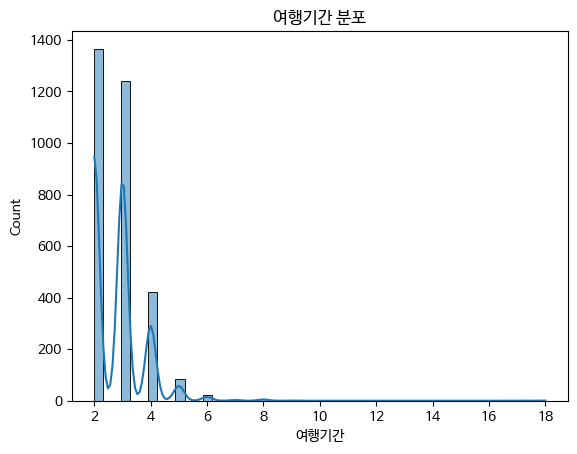

In [57]:
# 여행 기간 분포 확인
sns.histplot(preprocess_travel_notnull['여행기간'], bins = 50, kde = True)
plt.title("여행기간 분포")
plt.show()

In [58]:
preprocess_travel_notnull['여행기간'].skew()

np.float64(2.708862238488831)

In [59]:
# 데이터 확인용 csv 파일 저장
preprocess_travel_notnull.to_csv('preprocess_travel_notnull.csv', index=False, encoding='utf-8')

# 가설 검정

In [60]:
# 여행자 수 컬럼 추가
preprocess_travel_notnull.loc[:, '여행자수'] = preprocess_travel_notnull['여행동반자수'] + 1

# 그룹별 데이터 나누기
grouped = preprocess_travel_notnull.groupby('여행자수')


# 여행 기간에 대한 ANOVA, Kruskal-Wallis
## for name, group in grouped : 그룹별 데이터에서 각 그룹의 이름(name)과 해당 그룹에 속한 데이터프레임(group)을 반복해서 꺼냄
## group['여행기간'].dropna() : 반복해서 꺼낸 그룹에서 여행기간 컬럼만 가져와서 결측치(NaN)를 제거한 Series로 만듦
## * : 언패킹 연산자, 위에서 만들어진 리스트를 함수 인자로 쪼개서 전달
anova_duration = f_oneway(*[group['여행기간'].dropna() for name, group in grouped])
KW_duration = kruskal(*[group['여행기간'].dropna() for name, group in grouped])

# 결과 출력
print("여행 기간 ANOVA 결과:", anova_duration)
## pvalue=np.float64(3.1691532853391984e-15) : p-value가 0.05보다 작으므로, 여행자 수에 따라 여행기간이 유의하게 다르다
print("여행 기간 Kruskal-Wallis:", KW_duration)
## pvalue=np.float64(2.445065877321032e-23) : p-value가 0.05보다 작으므로, 여행자 수에 따라 여행기간이 유의하게 다르다

# 소비 금액에 대한 ANOVA, Kruskal-Wallis
anova_consume = f_oneway(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped])
KW_consume = kruskal(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped])

# 결과 출력
print("소비 금액 ANOVA 결과:", anova_consume)
## pvalue=np.float64(0.7973858563152847) : p-value가 0.05보다 크므로, 여행자 수에 따라 소비금액이 차이가 없다
print("소비 금액 Kruskal-Wallis 결과:", KW_consume)
## pvalue=np.float64(4.550755020176082e-19) : p-value가 0.05보다 작으므로, 여행자 수에 따라 소비금액이 유의하게 다르다
### 이 데이터는 정규성도 부족하고 이상치가 많이 존재하므로 ANOVA는 적절하지 않았고, Kruskal-Wallis가 더 적합


여행 기간 ANOVA 결과: F_onewayResult(statistic=np.float64(6.202970496382795), pvalue=np.float64(3.1691532853391984e-15))
여행 기간 Kruskal-Wallis: KruskalResult(statistic=np.float64(152.48237468559392), pvalue=np.float64(2.445065877321032e-23))
소비 금액 ANOVA 결과: F_onewayResult(statistic=np.float64(0.7164001823942192), pvalue=np.float64(0.7973858563152847))
소비 금액 Kruskal-Wallis 결과: KruskalResult(statistic=np.float64(130.3487147062488), pvalue=np.float64(4.550755020176082e-19))


/tmp/ipython-input-60-4170602325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull.loc[:, '여행자수'] = preprocess_travel_notnull['여행동반자수'] + 1


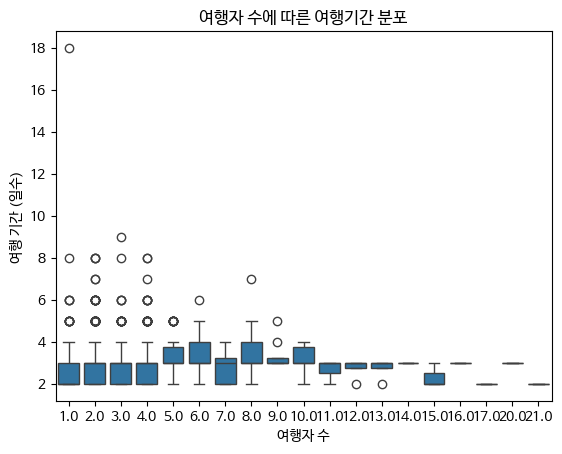

In [61]:
# 여행자 수 vs 여행 기간 (ANOVA & Kruskal) 시각화
## Boxplot (분포 + 중앙값 시각화)
sns.boxplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull)
plt.title("여행자 수에 따른 여행기간 분포")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간 (일수)")
plt.show()

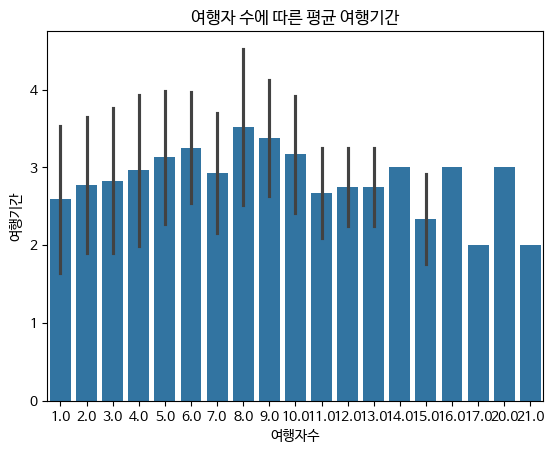

In [62]:
# 평균 & 표준편차 (barplot)
sns.barplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull, errorbar='sd')
plt.title("여행자 수에 따른 평균 여행기간")
plt.show()

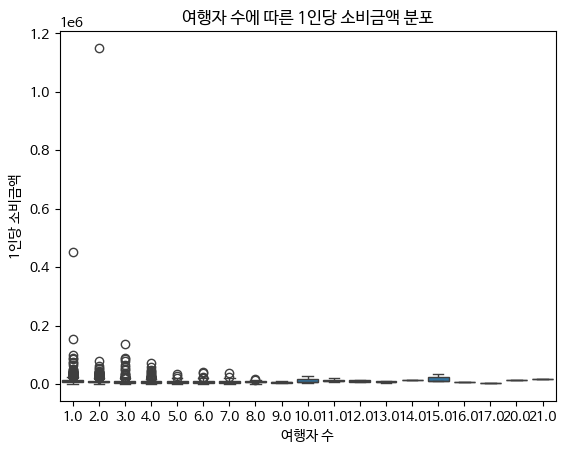

In [63]:
# 여행자 수 vs 1인당 소비금액(중앙값) (Kruskal 중심 해석)
## Boxplot (이상치 포함 전체 분포 시각화)
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull)
plt.title("여행자 수에 따른 1인당 소비금액 분포")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.show()

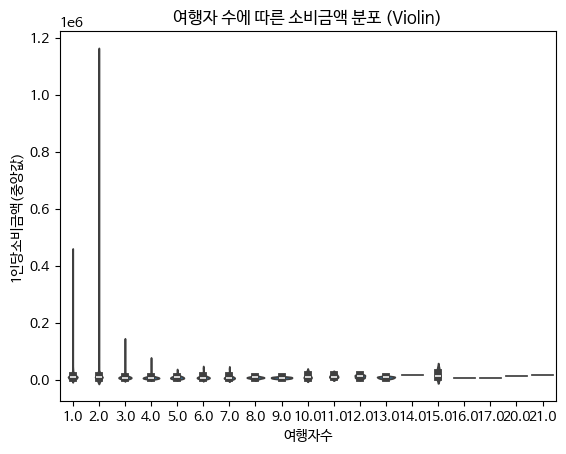

In [64]:
# Violinplot (분포 밀도 강조)
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull, inner='box')
plt.title("여행자 수에 따른 소비금액 분포 (Violin)")
plt.show()